In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import numpy as np


# make possible to import from src
notebook_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(notebook_dir, '..', '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

from my_secrets import my_path

In [2]:
# * specify input
df = pd.read_pickle(my_path + 'visualizations/data_frames/prepared_prelims.pkl')
df.head()

,ModelName,instance_name,solving_technique,file_created_at,model.Status,NodeCount,IterCount,Runtime,Work,SolCount,...,benders_started_count,total_time_in_user_cb,total_num_cuts,check_1,check_2,check_3,real_obj_val,output_file_name,experiment_name,total_time_outside_user_cb
0,Disjunctive-Programming,chr18b.dat,dp,2024-06-03_14-22.,2,2025.0,77102.0,94.340,6.082883,10,...,20.0,88.350335,231.0,True,True,True,None,output_2024-06-03_14-22_r1.txt,main_experiment_1,5.989665
1,Kaufman-Broeckx,chr18b.dat,kbl,2024-06-03_14-23.,2,10202.0,510217.0,22.745,22.002847,10,...,NaN,NaN,NaN,True,True,True,None,output_2024-06-03_14-23_r1.txt,main_experiment_1,NaN


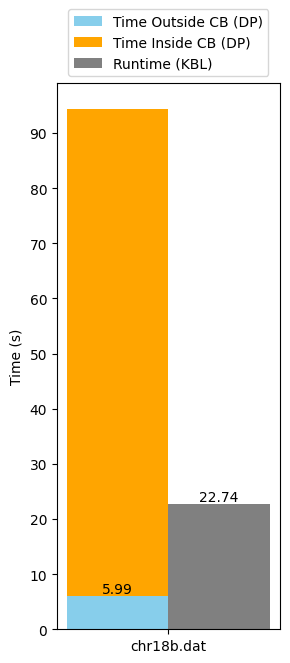

In [3]:
# only allow main experiment, where both kbl and dp have model status 2
dff1 = df.copy()
dff1 = dff1[(dff1['model.Status'] == 2)]
instances_with_both_f1 = dff1.groupby('instance_name')['solving_technique'].nunique()
instances_with_both_f1 = instances_with_both_f1[instances_with_both_f1 >= 2].index
dff1 = dff1[dff1['instance_name'].isin(instances_with_both_f1)]

df_pivot = dff1.pivot(index='instance_name', columns='solving_technique', values=['Runtime', 'total_time_in_user_cb', 'total_time_outside_user_cb'])

fig, ax = plt.subplots(figsize=(3, 6))

bar_width = 0.35
index = np.arange(len(df_pivot))

# plot stacked bars for dp
bars1 = ax.bar(index, df_pivot[('total_time_outside_user_cb', 'dp')], bar_width, label='Time Outside CB (DP)', color='skyblue')
bars2 = ax.bar(index, df_pivot[('total_time_in_user_cb', 'dp')], bar_width, bottom=df_pivot[('total_time_outside_user_cb', 'dp')], label='Time Inside CB (DP)', color='orange')

# plot bars for kbl
bars3 = ax.bar(index + bar_width, df_pivot[('Runtime', 'kbl')], bar_width, label='Runtime (KBL)', color='gray')

# display value at the top of bar 1
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# no value displayed at the top of bar 2 since thats confusing
# for bar in bars2:
#     height = bar.get_height() + bar.get_y()
#     ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'total {bar.get_height():.2f}', ha='center', va='bottom')

# display value at the top of bar 3
for bar in bars3:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(nbins=10))

# ax.set_yscale('log')

ax.set_ylabel('Time (s)')
# ax.set_xlabel('Instance Name')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_pivot.index, rotation=0)

plt.tight_layout()
plt.legend(loc='lower center', bbox_to_anchor=(0, 1, 1, 0))
# ! note savefig did not display legend right use copy to clipboard of ipynb instead
plt.savefig(my_path + 'visualizations/figures/initial_chr18b_test_cropped.png', format='png')
# ax.set_title('Initial testing Runtime of KBL vs stacked time Outside CB and time inside callback for DP')
plt.show()

In [4]:
latex_table = df_pivot.copy()
latex_table.columns = [' '.join(col).strip() for col in latex_table.columns.values]
latex_table = latex_table.reset_index()
latex_string = latex_table.style.hide(axis='index').to_latex(hrules=True)

print(latex_string)

\begin{tabular}{lrrrrrr}
\toprule
instance_name & Runtime dp & Runtime kbl & total_time_in_user_cb dp & total_time_in_user_cb kbl & total_time_outside_user_cb dp & total_time_outside_user_cb kbl \\
\midrule
chr18b.dat & 94.340000 & 22.745000 & 88.350335 & nan & 5.989665 & nan \\
\bottomrule
\end{tabular}

